=================================================

### Milestone 2

Nama  : Nakia Melvana

Batch : RMT-026

**Program ini dibuat mendeteksi penyakit Diabetes berdasarkan input parameternya, seperti umur, gender, status perokok, dan lainnya menggunakan pemodelan Machine Learning dengan algoritma SVM, KNN, Random Forest, Decision Tree, dan XGBoost. Metric yang digunakan adalah akurasi, presisi, f1-score, dan recall. Selain itu juga digunakan Cross validation.**

=================================================

# Conceptual Problems
1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

    Bagging (Bootstrap Aggregating) merupakan ensemble learning yang memiliki kegunaan untuk meningkatkan kinerja model dengan menggabungkan hasil dari beberapa model. Kelebihan utama dari bagging adalah mengurangi overfitting dan meningkatkan robustness dari model. 

    Cara kerjanya adalah dari keseluruhan jumlah data, akan di buat beberapa cluster. Data-data yang terkelompokkan tersebut akan diambil secara random sebanyak jumlah yang ditentukan. Misalnya ditentukan 100, berarti akan ada 100 kali training yang mana data nya akan di ambil secara random. Hasil dari training akan dibandingkan dan diambil paling banyak secara voting untuk klasifikasi dan secara rata-rata untuk regresi.  

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

    **Random Forest:**
- Setiap model dibuat secara independen dan paralel
- Melakukan training model secara independen pada subset yang berbeda pada data pelatihan
- Hasil prediksi merupakan hasil kalkulasi rata-rata untuk regresi dan voting untuk klasifikasi

   **XGBoost:**
- Merupakan sequential training
- Menggunakan data yang terjadi misklasifikasi oleh model yang sebelumnya
- hasil prediksi didapatkan dari weight averaging 
- XGBoost menggunakan teknik regularisasi dan shrinkage (learning rate) untuk mencegah overfitting dan memberikan kontrol yang lebih besar terhadap kompleksitas model.
- XGBoost meminimalkan fungsi tujuan yang terdiri dari dua bagian: loss function (fungsi kerugian) yang mengukur kesalahan prediksi dan term regularisasi yang mengontrol kompleksitas model.

3. Jelaskan apa yang dimaksud dengan Cross Validation !

    Cross Validation merupakan suatu metode evaluasi performa model yang melibatkan pembagian dataset menjadi subset yang saling tumpang tindih yang disebut "fold". Tujuan utama dari cross validation adalah untuk mengukur seberapa baik model dapat menggeneralisasi ke data yang belum pernah dilihat sebelumnya. Metode ini membantu menghindari kesalahan evaluasi yang mungkin terjadi jika hanya satu pembagian data digunakan.

  **Cara kerja cross validation:**
- dataset dibagi menjadi k fold
- setiap fold digunakan secara bergantian sebagai set pengujian, sementara fold lainnya sebagai set pelatihan
- data dilatih pada set pelatihan dan diuji pada set pengujian dan dilakukan sebanyak k kali sehingga fold digunakan sebagai set pengujian satu kali
- Hasil evaluasi dari setiap iterasi diambil rata-ratanya untuk memberikan metrik evaluasi kinerja model secara keseluruhan.

# Data Description
1. `Age`: 13-level age category (_AGEG5YR see codebook)

    1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 / 6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 / 11 = 70-74 / 12 = 75-79 / 13 = 80 or older

2. `Sex`: patient's gender (1: male; 0: female)

3. `HighChol`: 0 = no high cholesterol 1 = high cholesterol

4. `CholCheck`: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

5. `BMI`: Body Mass Index

6. `Smoker`: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

7. `HeartDiseaseorAttack`: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

8. `PhysActivity`: physical activity in past 30 days - not including job 0 = no 1 = yes

9. `Fruits`: Consume Fruit 1 or more times per day 0 = no 1 = yes

10. `Veggies`: Consume Vegetables 1 or more times per day 0 = no 1 = yes

11. `HvyAlcoholConsump`: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

12. `GenHlth`: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

13. `MentHlth`: days of poor mental health scale 1-30 days

14. `PhysHlth`: physical illness or injury days in past 30 days scale 1-30

15. `DiffWalk`: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

16. `Stroke`: you ever had a stroke. 0 = no, 1 = yes

17. `HighBP`: 0 = no high, BP 1 = high BP

18. `Diabetes`: 0 = no diabetes, 1 = diabetes

# Import Libraries

In [1]:
# Import libraries yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import kendalltau, pearsonr
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

# Data Loading

### Import dataset yang mau diolah menggunakan pandas 

In [2]:
df = pd.read_csv('diabetes_data.csv')
df.head(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


In [3]:
df.tail(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
70682,9.0,0.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,30.0,1.0,0.0,1.0,1.0
70683,10.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
70684,9.0,1.0,1.0,1.0,27.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,30.0,5.0,0.0,0.0,1.0,1.0
70685,7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
70686,11.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,30.0,0.0,0.0,0.0,1.0
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0
70691,9.0,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0


**Insight:** Data yang ditampilkan adalah data 10 teratas dan 10 terbawah yang mana jika dilihat dari data yang ditampilkan semua data bertipe numerik. Tetapi hal ini selanjutnya perlu di cek lagi dengan menampilkan data summary apakah terdapat data kategorik yang telah di-encoded

### Menampilkan summary dari dataset yang akan digunakan untuk mengetahui detail kondisi data dari  dataset

In [4]:
# Menampilkan summary data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

**Insight:** Dari summary yang tersedia, menunjukkan bahwa semua kolom dari dataset yang digunakan semua bertipe data numerik. Jumlah data yang tersedia adalah 70692 data dengan 18 kolom yang tersedia.

### Dari dataset tersebut, dilakukan pengecekan apakah terdapat data duplikat

In [5]:
# cek duplikat data
print('Jumlah data yang terduplikat:', df.duplicated().sum())

Jumlah data yang terduplikat: 6672


**Insight:** Terdapat data yang terduplikat sebanyak 6672 data. Maka dari itu perlu dilakukan proses drop data yang terduplikat. 

### Drop duplikat data

In [6]:
# remove data duplikat
df.drop_duplicates(inplace = True)

In [7]:
# cek duplikat data setelah di remove
print('Jumlah duplikat data setelah di remove:', df.duplicated().sum())
print('Jumlah data setelah remove duplikat:', len(df))

Jumlah duplikat data setelah di remove: 0
Jumlah data setelah remove duplikat: 64020


**Insight:** Data yang terduplikat telah di remove sehingga jumlah data telah berkurang menjadi 64020 data.

### Setelah dilakukan pengecekan duplikat, selanjutnya dilakukan pengecekan missing value

In [8]:
# cek missing value
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

**Insight:** Tidak terdapat missing value di dalam data, sehingga data siap masuk ke proses eksplorasi.

# Exploratory Data Analysis (EDA)

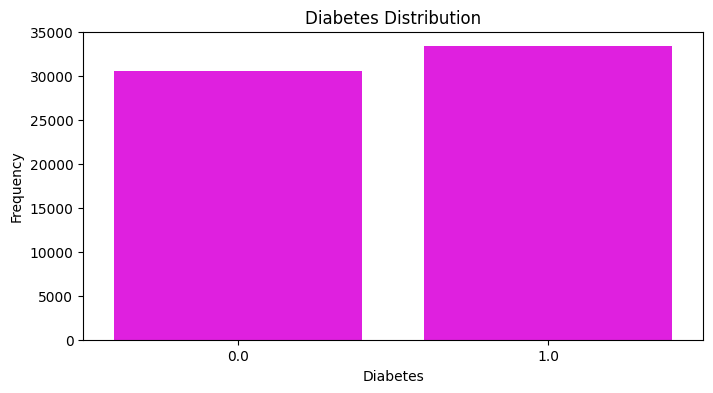

In [9]:
# mendefinisikan ukuran dari grafik
plt.figure(figsize=(8, 4))
# plot kolom diabetes dengan menggunakan countplot
sns.countplot(x='Diabetes', data=df, color='magenta')
# set judul
plt.title('Diabetes Distribution')
# set x label
plt.xlabel('Diabetes')
# set y label
plt.ylabel('Frequency')
# menampilkan grafik
plt.show()

**Insight:** Berdasarkan dustribusi dari data yang terdeteksi diabetes, terlihat bahwa distribusi cukup balance antara orang yang terkena diabetes, yaitu nomor 1, dan orang yang tidak terkena diabetes, yaitu nomor 0. Hal ini menunjukkan distribusi data yang baik karena diabetes merupakan target dari prediksi. Sehingga algoritma pada proses training akan secara balance mempelajari fitur-fitur yang memprediksi diabetes maupun tidak. 

<Axes: title={'center': 'Correlation with Diabetes'}>

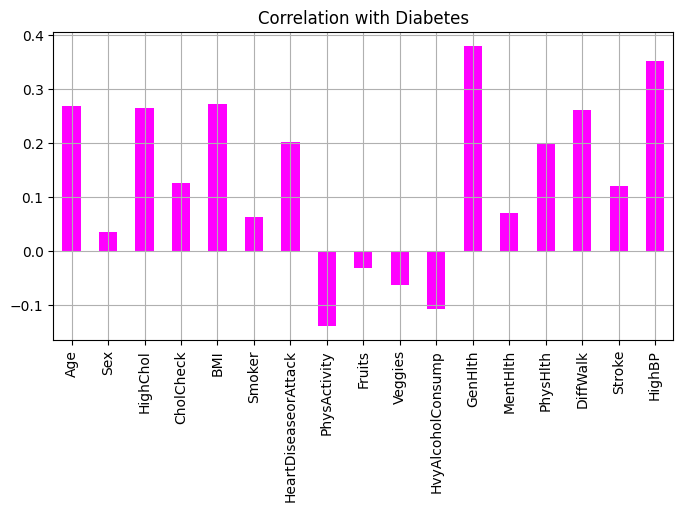

In [10]:
# Mendefinisikan ukuran gambar
plt.figure(figsize=(8, 4))
# plot korelasi dengan target
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar', grid=True, title="Correlation with Diabetes",color="magenta")

**Insight:** Dilakukan plot correlation matrix untuk mengetahui fitur-fitur apa saja yang tidak berkorelasi dengan target. Dari semua fitur yang diambil, fitur 'Sex', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump','MentHlth','CholCheck', 'Stroke' memiliki nilai yang rendah, yaitu mendekati nilai nol untuk korelasi dengan diabetes. Hal ini menunjukkan bahwa fitur tersebut tidak berkorelasi dengan target dan perlu di drop datanya atau tidak digunakan pada proses sistem prediksi diabetes. Fitur lain yang berada di atas 0.1 atau di bawah -0.1 dianggap memiliki korelasi dengan target. 

<Figure size 800x400 with 0 Axes>

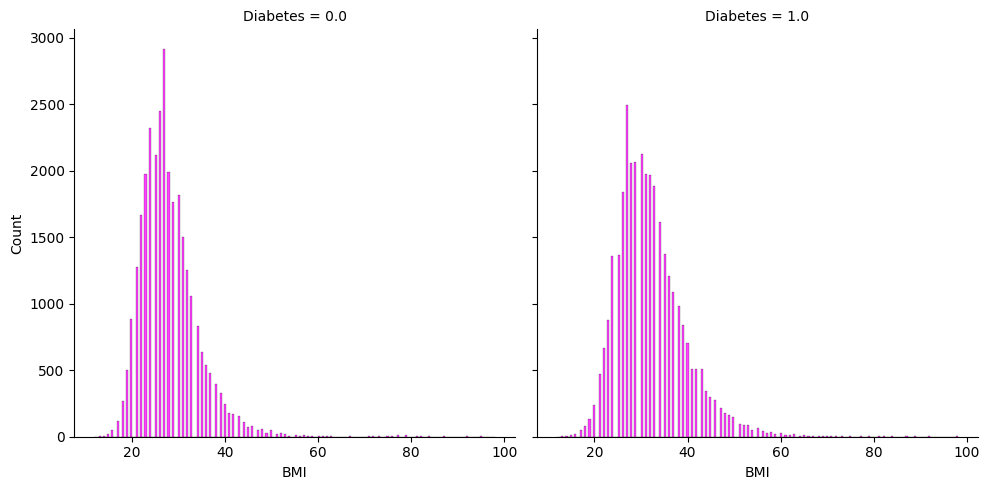

In [11]:
# Set ukuran gambar
plt.figure(figsize=(8,4))
# plot menggunakan displot
sns.displot(x='BMI', col='Diabetes' , data = df, kind="hist" ,color = 'magenta')

**Insight:** Dari gambar displot yang dihasilkan, terlihat jelas bahwa orang dengan BMI di atas 30 berada paling banyak di grafik orang dengan diabetes. sedangkan pada grafik orang yang tidak terkena diabetes lebih sedikit. Hal ini menunjukkan bahwa BMI berkorelasi dengan diabetes. Semakin tinggi BMI maka peluang untuk terkena diabetes nya juga akan semakin tinggi. Walaupun orang dengan BMI yang tinggi juga berada di kelompok orang yang tidak terkena diabetes.

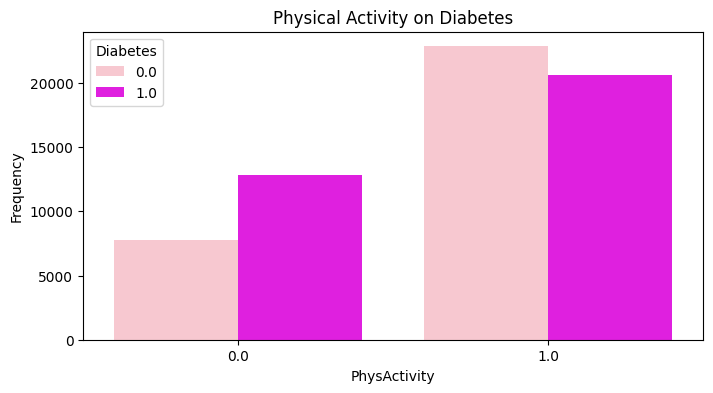

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='PhysActivity', hue='Diabetes', palette = ['pink','Magenta'])
# set judul
plt.title('Physical Activity on Diabetes')
# set x label
plt.xlabel('PhysActivity')
# set y label
plt.ylabel('Frequency')
# menampilkan grafik
plt.show()

**Insight:** Pada grafik countplot yang diambil, jika dilihat dari physical activity yang dilakukan oleh setiap orang, orang yang tidak melakukan physical activity distribusinya lebih banyak yang memiliki penyakit diabetes dibandingkan dengan yang melakukan physical activity. Hal ini dapat terlihat bahwa diabetes memiliki hubungan dengan penyakit diabetes. Penyakit diabetes dapat dicegah dengan melakukan olahraga yang teratur. 

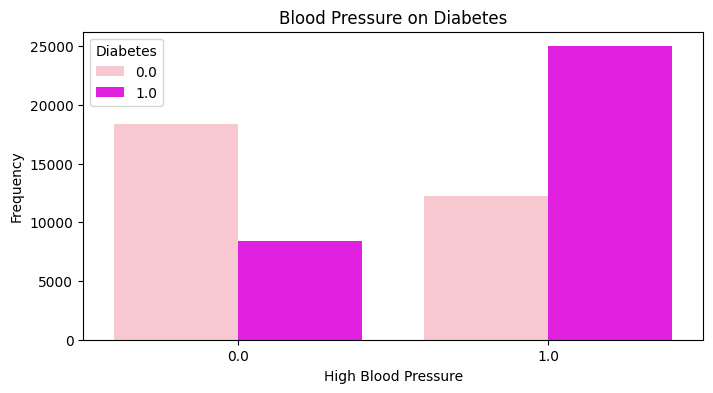

In [13]:
# Set ukuran gambar
plt.figure(figsize=(8,4))
# Plot menggunakan countplot
sns.countplot(data=df, x='HighBP', hue='Diabetes', palette = ['pink','Magenta'])
# set judul
plt.title('Blood Pressure on Diabetes')
# set x label
plt.xlabel('High Blood Pressure')
# set y label
plt.ylabel('Frequency')
# menampilkan grafik
plt.show()

**Insight:** Jika dilihat dari countplot antara highBP dan diabetes, terlihat bahwa orang-orang yang memiliki high blood pressure itu cenderung lebih banyak memiliki penyakit diabetes dibandingkan orang yang tidak memiliki high blood pressure. Hal ini berarti orang-orang yang memiliki diabetes cenderung memiliki high blood pressure dibandingkan dengan orang yang tidak terkena diabetes.

# Feature Engineering

### Mendefinisikan kolom numerik dan kategorik yang akan digunakan walaupun semua tipe data adalah numerik, tetapi banyak data yang merupakan data kategorik yang telah di encoded

In [14]:
df_num= ['Age', 'BMI', 'PhysHlth']
df_cat= ['HighChol','GenHlth',
       'PhysActivity',
       'HighBP']

**Insight:** Tidak semua fitur digunakan karena setelah dilakukan plot korelasi, terdapat beberapa fitur yang tidak perlu digunakan karena tidak memiliki korelasi. Feature 'DiffWalk' dan 'HeartDiseaseorAttack' tidak dimasukkan karena dari hasil uji coba, ketika tiddak menggunakan kedua feature tersebut hasilnya sama atau tidak jauh berbeda ketika menggunakan kedua feature tersebut. Maka dari itu, dipertimbangkan untuk tidak menggunakan nya karena dapat mempercepat proses running model dan mengurangi beban komputasi.

In [15]:
df.drop(['Sex', 'CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth','Stroke', 'HeartDiseaseorAttack', 'DiffWalk'], inplace= True, axis=1)

**Insight:** Feature yang tidak digunakan pada data original akan di drop

## Handling Cardinality

### Sebelum data perlu diolah dalam proses FE, data perlu di cek cardinality nya terlebih dahulu khusus data kategorik, sehingga nantinya dapat ditentukan yang merupakan data kategorik dan menggunakan metode encoding yang sesuai dengan data 

In [16]:
# mendefinisikan kolom yang masuk ke tipe data kategorik dan dijadikan sebagai list
cat_cols = df_cat

# membuat list kosong listItem
listItem = []
# membuat forloop untuk kolom yang berada di dalam cat_cols
for col in cat_cols:
  # memasukkan nama kolom dan jumlah nilai unique pada list
  listItem.append([col, df[col].nunique(), df[col].unique()])

# membuat dataframe dari listItem
pd.DataFrame(columns=['Nama Kolom', 'Jumlah Nilai Unique', 'Nilai Unique'], data=listItem)

,Nama Kolom,Jumlah Nilai Unique,Nilai Unique
0,HighChol,2,"[0.0, 1.0]"
1,GenHlth,5,"[3.0, 1.0, 2.0, 4.0, 5.0]"
2,PhysActivity,2,"[1.0, 0.0]"
3,HighBP,2,"[1.0, 0.0]"


**Insight:** Semua cardinality dari kolom kategorik yang akan dipakai tidak tinggi, sehingga data siap untuk digunakan. 

### Cek apakan data balance atau tidak

In [17]:
df['Diabetes'].value_counts()

Diabetes
1.0    33398
0.0    30622
Name: count, dtype: int64

**Insight:** Data balance, jadi tidak perlu di handle dengan SMOTE

## *Splitting feature* X dan y

In [18]:
#memisahkan antara fitur x dan y
X = df.drop(['Diabetes'], axis = 1)
y = df['Diabetes']

**Insight:** Memisahkan antara feature X dan target y. Target y merupakan kolom Diabetes karena tujuan dari pemodelan adalah untuk memprediksi nilai tersebut. Kolom berhasil dipisah terlihat dari dimensi X dan y.

## Splitting train-set dan test-set

In [82]:
# split data menjadi empat bagian, X_train, X_test, y_train, dan y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, # komposisi data test sebesar 20% dari keseluruhan data
                                                    stratify=y,
                                                    random_state = 0)     # State kerandoman data ada pada state ke 0

# Menampilkan ukuran dataframe dari X_train, X_test, y_train, dan y_test
print('X Train Size: ', X_train.shape)
print('X Test Size: ', X_test.shape)
print('y Train Size: ', y_train.shape)
print('y Test Size: ', y_test.shape)

X Train Size:  (51216, 7)
X Test Size:  (12804, 7)
y Train Size:  (51216,)
y Test Size:  (12804,)


**Insight:** Jumlah data train sebanyak 51216 dan jumlah data test sebanyak 12804 dengan banyak nya kolom data train adalah sebanyak 7 kolom.

## Handling Outliers

### Setelah handling cardinality dan dataset di split menjadi dataset train dan test, proses selanjutnya adalah handling outliers. Handling outliers ini dilakukan setelah split dataset bertujuan untuk mencegah adanya kebocoran data atau data leakage. Langkah pertama adalah menghitung nilai skewness untuk melihat apakah data terdistribusi normal atau terjadi skewed data. 

In [83]:
# Mendefinisikan kolom numerik 
num_cols = df_num
# Membuat list kosong 
listItem= []
# Membuat forloop untuk kolom di dalam num_cols
for col in num_cols:
  # Memasukkan kolom yang merupakan kolom numerik dan menghitung nilai skew nya
  listItem.append([col, X_train[col].skew()])

# membuat dataframe dari nilai skew yang telah dihitung
pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)

,nama kolom,nilai skewness
0,Age,-0.543344
1,BMI,1.658460
2,PhysHlth,1.513551


**Insight:** fitur BMI dan PhysHlth mengalami extreme skew sehingga perlu di handle dengan metode capping IQR, sedangkan fitur Age tidak mengalami nilai Skew sehingga di handle dengan gaussian

### Variabel yang memiliki outliers tinggi dilakukan metode capping dengan menggunakan IQR untuk mengeliminasi outliers yang ada di luar IQR. 

In [84]:
# capping data untuk data yang mengalami skewed
winsoriser2 = Winsorizer(capping_method='iqr', # menggunakan metode IQR
                            tail='both', # capping dilakukan pada outlier batas atas dan batas bawah
                            fold=3, # menetapkan nilai fold
                            #mendefinisikan kolom yang data nya terdistribusi secara skewed
                            variables=[ 'BMI', 'PhysHlth'],
                            missing_values='ignore')

# mendefinisikan dataset X_train yang telah di capping  dengan melakukan fit_transform
X_train = winsoriser2.fit_transform(X_train)
# mendefinisikan dataset X_test yang telah di capping  dengan melakukan transform
X_test = winsoriser2.transform(X_test)

**Insight:** Handling outliers dengan data yang terdistribusi skewed menggunakan metode IQR dengan fold 3. Terlihat dari nilai skewness, fitur BMI dan PhysHlth mengalami extreme skew sehingga perlu dihandle dengan menggunakan fold 3.

### Variabel yang telah terdistribusi secara normal dilakukan teknik capping dengan menggunakan gaussian. 

In [85]:
# Capping data untuk data terdistribusi normal
winsoriser1 = Winsorizer(capping_method='gaussian', # Metode capping yang digunakan adalah gaussian untuk data terdistribusi normal
                            tail='both', # capping dilakukan pada outlier batas atas dan batas bawah
                            fold=1.5,
                            # mendefinisikan kolom yang data nya terdistribusi secara normal
                            variables=['Age'],
                            # ignore missing value
                            missing_values='ignore')

# mendefinisikan dataset X_train yang telah di capping  dengan melakukan fit_transform
X_train = winsoriser1.fit_transform(X_train)
# mendefinisikan dataset X_test yang telah di capping  dengan melakukan transform
X_test = winsoriser1.transform(X_test)

**Insight:** Metode yang digunakan adalah gaussian untuk kolom yang terdistribusi secara normal dengan menggunakan fold 1,5. Nilai fold menandakan seberapa jauh untuk menempatkan nilai pembatasan. Nilai 3 paling jauh, dan nilai 1 paling dekat. Dari hasil uji coba, menggunakan fold = 1.5 menghasilkan metriks evaluasi yang lebih baik.

## Handling Missing Value

In [23]:
X_train.isnull().sum()

Age             0
HighChol        0
BMI             0
PhysActivity    0
GenHlth         0
PhysHlth        0
HighBP          0
dtype: int64

**Insight:** Tidak terdapat missing value di dalam X_train

In [24]:
X_test.isnull().sum()

Age             0
HighChol        0
BMI             0
PhysActivity    0
GenHlth         0
PhysHlth        0
HighBP          0
dtype: int64

**Insight:** Tidak terdapat missing value di dalam X_test

In [25]:
y_train.isnull().sum()

0

**Insight:** Tidak terdapat missing value di dalam y_train

In [26]:
y_test.isnull().sum()

0

**Insight:** Tidak terdapat missing value di dalam y_test

## Feature Selection

In [86]:
# Mendefinisikan kolom data numerik dan data kategorik 
num_columns = df_num
cat_columns = df_cat
# menampilkan list kolom numerik dan kolom kategorik
print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['Age', 'BMI', 'PhysHlth']
Categorical Columns:  ['HighChol', 'GenHlth', 'PhysActivity', 'HighBP']


**Insight:** Kolom numerik dan kategorik yang didefinisikan telah didefinisikan sebelumnya menggunakan df_num dan df_cat. Dari data keseluruhan df, tidak semua fitur digunakan karena beberapa fitur tidak berkorelasi dengan target. Data numerik memiliki jumlah feature sebanyak 3 feature sedangkan data kategorik memiliki jumlah feature sebanyak 4 feature. 

In [87]:
# Split kolom numerik dan kolom kategorik pada dataset train dan test
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

# menampilkan dataset train numerik
X_train_num.head(3)

,Age,BMI,PhysHlth
27872,9.000000,22.0,0.0
63893,12.901597,27.0,0.0
2699,12.000000,27.0,0.0


**Insight:** data train dan data test pada data numerik dan kategorik telah terpisah yang kemudian akan dilakukan uji korelasi untuk mengetahui feature-feature yang berkorelasi dengan target. 

In [88]:
# Mendefinisikan list kosong untuk p_values, interpretasi, dan cols
p_values = []
interpretasi = []
cols = []

# melakukan forloop untuk kolom yang terdapat didalam dataset kategorik
for col in X_train_cat.columns:
  # melakukan uji korelasi dengan menggunakan kendaltau pada setiap kolom dataset kategorik
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  #input p_values ke dalam list p_values
  p_values.append(p_value)
  # input nama kolom ke list cols
  cols.append(col)

  # dilakukan pengecekan, jika p_value di bawah nilai 0.05, maka terdapat korelasi
  if p_value < 0.05:
    interpretasi.append('Terdapat Korelasi')
  # jika p_value berada di atas nilai 0.05, maka tidak terdapat korelasi
  else :
    interpretasi.append('Tidak terdapat korelasi')

# membuat dataframe untuk nama kolom dan hasil dari interpretasi
pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,HighChol,Terdapat Korelasi
1,GenHlth,Terdapat Korelasi
2,PhysActivity,Terdapat Korelasi
3,HighBP,Terdapat Korelasi


**Insight** Hasil uji korelasi menunjukkan bahwa semua fitur yang ada di kolom kategorik memiliki korelasi dengan target, sehingga tidak ada fitur yang perlu di drop. 

In [89]:
# Mendefinisikan list kosong untuk p_values, interpretasi, dan cols
p_values = []
interpretasi = []
cols = []

# forloop untuk kolom yang berada di dataset numerik
for col in X_train_num.columns:
  # melakukan perhitungan uji korelasi dengan menggunakan pearsonr untuk data numerik
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  # p_value yang didapat kemudian dimasukkan ke dalam list p_value
  p_values.append(p_value)
  # memasukkan nama dari setiap kolom numerik
  cols.append(col)

  # cek jika p_value di bawah 0.05, maka terdapat korelasi
  if p_value < 0.05:
    interpretasi.append('Terdapat korelasi')
  # jika p_value di atas nilai 0.05, maka tidak terdapat korelasi
  else :
    interpretasi.append('Tidak terdapat korelasi')

# membuat dataframe untuk kolom han hasil interpretasi
pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,Age,Terdapat korelasi
1,BMI,Terdapat korelasi
2,PhysHlth,Terdapat korelasi


**Insight** Hasil uji korelasi menunjukkan bahwa semua fitur yang ada di kolom numerik memiliki korelasi dengan target, sehingga tidak ada fitur yang perlu di drop. 

## Concate kolom numerik dan kategorik

In [90]:
#Concate kolom train dan test
X_train = np.concatenate([X_train_num, X_train_cat], axis = 1)
X_test = np.concatenate([X_test_num, X_test_cat], axis = 1)

# menunjukkan dataset array final yang telah di concate
X_train

array([[ 9.        , 22.        ,  0.        , ...,  2.        ,
         1.        ,  0.        ],
       [12.90159714, 27.        ,  0.        , ...,  4.        ,
         1.        ,  1.        ],
       [12.        , 27.        ,  0.        , ...,  3.        ,
         1.        ,  0.        ],
       ...,
       [ 9.        , 38.        ,  3.        , ...,  2.        ,
         0.        ,  1.        ],
       [ 8.        , 23.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 9.        , 30.        ,  0.        , ...,  4.        ,
         0.        ,  0.        ]])

**Insight:** Kolom numerik dan kategorik yang telah di concate masih dalam bentuk array, maka dari itu perlu dirubah menjadi dataframe 

In [91]:
# Cek dimensi dataset final
X_train.shape

(51216, 7)

**Insight:** Setelah dataset numerik dan kategorik digabung, jumlah feature final pada dataset berjumlah 7 kolom.

In [92]:
# Membuat dataframe untuk X_train
X_train = pd.DataFrame(X_train, columns=np.concatenate([X_train_num.columns, X_train_cat.columns]))
# Menampilkan dataframe X_train
X_train.head(3)

,Age,BMI,PhysHlth,HighChol,GenHlth,PhysActivity,HighBP
0,9.000000,22.0,0.0,0.0,2.0,1.0,0.0
1,12.901597,27.0,0.0,0.0,4.0,1.0,1.0
2,12.000000,27.0,0.0,1.0,3.0,1.0,0.0


In [93]:
# Membuat dataframe untuk X_test
X_test = pd.DataFrame(X_test, columns=np.concatenate([X_test_num.columns, X_test_cat.columns]))
# Menampilkan dataframe X_test
X_test.head(3)

,Age,BMI,PhysHlth,HighChol,GenHlth,PhysActivity,HighBP
0,5.0,47.0,28.0,0.0,3.0,0.0,1.0
1,8.0,27.0,0.0,0.0,1.0,1.0,0.0
2,11.0,24.0,0.0,0.0,3.0,0.0,1.0


**Insight:** Dataset test dan train yang telah di concate perlu untuk di tranformasi menjadi pandas dataframe untuk masuk ke proses modelling, karena pada proses modelling tidak bisa datanya dalam bentuk array. 

# Modelling

### Model yang digunakan adalah SVM, KNN, Decision Tree, Random Forest, dan XGBoost. 

In [94]:
# Membuat kolom trandormer untuk preprocessing
transformer = ColumnTransformer([
    ('scaler', MinMaxScaler(), num_columns),
    ('encoding', OrdinalEncoder(), cat_columns)
    ])


#Membuat pipeline untuk SVM
pipe_svm = Pipeline([
('transformer', transformer),
('classifier', SVC())
])

#Membuat pipeline untuk KNN
pipe_knn = Pipeline([
('transformer', transformer),
('classifier', KNeighborsClassifier())
])

#Membuat pipeline untuk Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier())
])

#Membuat pipeline untuk Random Forest   
pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier())
])

#Membuat pipeline untuk XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier())
])

**Insight:** Pada bagian modelling, terdapat proses transformer yang mana terdapat proses scalling dan encoding. Penggunaan MinMaxScaler ini dikarenakan data sebagian besar mengalami skewed distribution. Sedangkan metode encoding yang digunakan adalah ordinal encoding dikarenakan data kategorik memiliki level. Digunakan metode pipeline dalam modelling dengan tujuan untuk mencegah data leakage dan memuat kodingan lebih sederhana.

**Karakteristik Umum dari setiap model:**
- `SVM` = kerja dari model ini untuk mencari decision boundaries yang mana goals nya adalah mencari hyperplan atau garis pemisah. 
- `KNN` = Non-parametric algorithm (tidak butuh asumsi). Hanya butuh informasi jarak/titik-titik dari persebaran data. Lebih flexible dari pada algoritma hipotesis, jadi untuk persebaran data yang tidak normal masih baik. 
- `Decision Tree` = Decision tree dapat berupa regresi dan klasifikasi, tetapi regresi menghasilkan hasil yang kurang baik. Algoritma ini juga non parametric model, jadi tidak perlu ada syarat awal pada data. Decision tree di scikit-learn memiliki algoritma CART (Classification and Regression Trees Algorithm) yang mana hanya memiliki dua cabang, true or false. Jadi kalau mau ada cabang lagi, berarti bikin lagi. Pendekatannya top-down (yang paling pengaruh ke bawah), bisa digunakan pada data yg non linear dan robust dari outliers. 
- `Random Forest` = Cara kerja algoritma random forest adalah dengan membuat setiap model secara independen dan paralel. Lalu dilakukan training model pada subset yang berbeda pada data pelatihan dan hasil prediksinya merupakan kalkulasi rata-rata untuk regresi dan voting untuk klasifikasi. 
- `XGBoost` = XGBoost menggunakan teknik regularisasi dan shrinkage (learning rate) untuk mencegah overfitting dan memberikan kontrol yang lebih besar terhadap kompleksitas model.



# Baseline Model Evaluation

## KNN

### Fit, predict model, dan menghitung nilai akurasi dari training dan testing model

In [95]:
# fit model pada train set
pipe_knn.fit(X_train, y_train)
# predict model pada test set
y_knn_pred = pipe_knn.predict(X_test)
# Menampilkan nilai akurasi training dan testing
print('Training Score: ',round(pipe_knn.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test),4))

Training Score:  0.7696
Testing Score:  0.6947


**Insight:** Hasil akurasi training yang di dapatkan adalah 76% dengan akurasi testing sebesar 69%. Hasil yang didapatkan tidak terlalu bagus karena hasilnya mengindikasikan adanya overfitting. Hal ini diduga dikarenakan data split yang dilakukan sebesar 80% untuk data training dan 20% untuk data testing sehingga model memang lebih banyak belajar dari data training tetapi tidak cukup baik prediksi nya dalam melakukan testing. Nilai kerandoman juga dapat memengaruhi dari performa akurasi training dan testing karena data diacak secara random. Untuk meningkatkan performa akurasi dari model knn ini dapat di lakukan dengan kembali melakukan feature selection, mencoba dengan nilai kerandoman yang berbeda, melakukan hyperparameter tuning, dan mencoba pembagian data menjadi 75% data training dan 25% data testing sehingga dapat meminimalkan peluang terjadinya overfitting. 

In [96]:
# Mendefinisikan target
target = ['No Diabetes', 'Diabetes']
# menampilkan classification report
print(classification_report(y_test, y_knn_pred, target_names = target))

              precision    recall  f1-score   support

 No Diabetes       0.69      0.65      0.67      6124
    Diabetes       0.69      0.74      0.72      6680

    accuracy                           0.69     12804
   macro avg       0.69      0.69      0.69     12804
weighted avg       0.69      0.69      0.69     12804



**Insight:** Jika dilihat dari hasil precision, recall, dan f1-score, Hasil prediksi dari kedua kelas cukup seimbang dengan nilai yang dihasilkan. Ini berarti model dapat mendeteksi kedua kelas secara seimbang dilihat dari bagaimana model mendeteksi secara benar memprediksi kelas positif yang dilihat dari presisi, seberapa sering model dapat memprediksi positive instances (True Positive) dari semua nilai positif nya atau nilai aktual nya yang dilihat dari Recall, dan rata-rata harmonik dari precision dan recall. Karena prediksi yang dilakukan adalah prediksi apakah seseorang terkena diabetes atau tidak, jadi yang lebih diperhatikan adalah nilai dari recall nya. nilai recall untuk kelas No diabetes adalah 65% dan kelas Diabetes adalah 74%. Hal ini menunjukkan bahwa model lebih baik dalam mendeteksi orang dengan Diabetes dibandingkan dengan orang yang tidak terkena diabetes. 

In [38]:
# menggunakan StratifiedKFold untuk cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# mendefinisikan F1 scorer untuk cross validation
f1_scorer = make_scorer(f1_score)

# menghitung cross validation
f1_train_cross_val = cross_val_score(pipe_knn, X_train, y_train, cv=stratified_kfold, scoring=f1_scorer)

# menampilkan hasil
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.71986528 0.71520436 0.7145597 ]
F1 Score - Mean - Cross Validation :  0.7165431149532827
F1 Score - Std - Cross Validation  :  0.0023638242645546564
F1 Score - Range of Test-Set       :  0.7141792906887281 - 0.7189069392178373


**Insight:** Cross validation yang digunakan adalah StratifiedKFold karena menghasilkan nilai yang lebih baik dan juga dikarenakan terdapat beberapa variable yang multicolinear. Hasil dari cross validation menghasilkan nilai yang baik dan konsisten di angka 71%. Hal ini menunjukkan model cukup reliable dan dapat dipercaya pada proses prediksinya. Nilai standar deviasinya juga kecil yaitu diangka 0.002. Semakin standar deviasi mendekati nol, maka model dianggap lebih baik. 

## Decision Tree

### Fit, predict model, dan menghitung nilai akurasi dari training dan testing model

In [97]:
# fit model pada train set
pipe_dt.fit(X_train, y_train)
# predict model pada test set
y_dt_pred = pipe_dt.predict(X_test)
# Menampilkan nilai akurasi training dan testing
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  0.852
Testing Score:  0.6638


**Insight:** Hasil akurasi training yang di dapatkan adalah 85% dengan akurasi testing sebesar 66%. Hasil yang didapatkan tidak  bagus karena hasilnya mengindikasikan adanya overfitting. Hal ini diduga dikarenakan data yang digunakan sangat banyak tetapi data yang diacak secara random tidak tersebar secara merata pada set training dan split sehingga menghasilkan angka yang sangat jauh antara training dan testingnya. Nilai kerandoman juga dapat memengaruhi dari performa akurasi training dan testing karena data diacak secara random. Selain itu karena data yang digunakan cukup banya, proses modelling juga semakin kompleks dan bisa menyebabkan adanya overfitting. Untuk meningkatkan performa akurasi dari model decision tree ini dapat di lakukan dengan kembali melakukan feature selection, mencoba dengan nilai kerandoman yang berbeda, mengurangi jumlah data, dan mencoba pembagian data menjadi 75% data training dan 25% data testing sehingga dapat meminimalkan peluang terjadinya overfitting. 

In [98]:
# Mendefinisikan target
target = ['No Diabetes', 'Diabetes']
# menampilkan classification report
print(classification_report(y_test, y_dt_pred, target_names = target))

              precision    recall  f1-score   support

 No Diabetes       0.64      0.67      0.66      6124
    Diabetes       0.69      0.65      0.67      6680

    accuracy                           0.66     12804
   macro avg       0.66      0.66      0.66     12804
weighted avg       0.66      0.66      0.66     12804



**Insight:** Jika dilihat dari hasil precision, recall, dan f1-score, Hasil prediksi dari kedua kelas cukup seimbang dengan nilai yang dihasilkan. Ini berarti model dapat mendeteksi kedua kelas secara seimbang terlihat dari bagaimana model mendeteksi secara benar memprediksi kelas positif yaitu presisi, seberapa sering model dapat memprediksi positive instances (True Positive) dari semua nilai positif nya atau nilai aktual nya yang dilihat dari Recall, dan rata-rata harmonik dari precision dan recall. Karena prediksi yang dilakukan adalah prediksi apakah seseorang terkena diabetes atau tidak, jadi yang lebih diperhatikan adalah nilai dari recall nya. Recall pada kelas No diabetes sebesar 67% lebih besar dibandingkan dengan kelas Diabetes sebesar 65%. Berarti model ini lebih baik dalam deteksi orang yang tidak terkena diabetes dibandingkan dengan orang yang terkena diabetes walaupun dalam persentase tidak begitu jauh.

In [41]:
# menggunakan StratifiedKFold untuk cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# mendefinisikan F1 scorer untuk cross validation
f1_scorer = make_scorer(f1_score)

# menghitung cross validation
f1_train_cross_val = cross_val_score(pipe_dt, X_train, y_train, cv=stratified_kfold, scoring=f1_scorer)

# menampilkan hasil
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.66118859 0.66051128 0.66084038]
F1 Score - Mean - Cross Validation :  0.6608467484444406
F1 Score - Std - Cross Validation  :  0.0002765461306952778
F1 Score - Range of Test-Set       :  0.6605702023137453 - 0.6611232945751359


**Insight:** Cross validation yang digunakan adalah StratifiedKFold karena menghasilkan nilai yang lebih baik dan juga dikarenakan terdapat beberapa variable yang multicolinear. Hasil dari cross validation menghasilkan nilai yang baik dan konsisten di angka 66%. Hal ini menunjukkan model cukup reliable dan dapat dipercaya pada proses prediksinya. Tetapi nilai f1 yang dihasilkan pada model decision tree ini tidak lebih baik dibandingkan dengan model knn walaupun nilai standar deviasi yang dihasilkan sangat bagus dan lebih kecil dibandingkan dengan model KNN, yaitu sebesar 0,0002. Semakin standar deviasi mendekati nol, maka model dianggap lebih baik. 

## Support Vector Machine (SVM)

### Fit, predict model, dan menghitung nilai akurasi dari training dan testing model

In [42]:
# fit model pada train set
pipe_svm.fit(X_train, y_train)
# predict model pada test set
y_svm_pred = pipe_svm.predict(X_test)
# Menampilkan nilai akurasi training dan testing
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  0.7287
Testing Score:  0.7259


**Insight:** Hasil akurasi training yang di dapatkan adalah 73% dengan akurasi testing sebesar 72%. Hasil yang didapatkan cukup bagus karena hasilnya tidak mengindikasikan adanya overfitting. Walaupun hasil yang didapatkan cukup bagus, tetapi dari segi komputasi yang dibutuhkan untuk menjalankan model svm ini cukup tinggi dan waktu yang dibutuhkan lebih banyak sekitar 5 menit dibandingkan dengan model lainnya. Hal ini memang salah satu kelemahan dari svm, yaitu tidak cocok untuk dataset yang besar. Untuk meningkatkan performa akurasi dari model svm ini dapat di lakukan dengan kembali melakukan feature selection, mengurangi jumlah data, dan hyperparamater tuning. 

### Menampilkan classification report

In [43]:
# Mendefinisikan target
target = ['No Diabetes', 'Diabetes']
# menampilkan classification report
print(classification_report(y_test, y_svm_pred, target_names = target))

              precision    recall  f1-score   support

 No Diabetes       0.76      0.63      0.69      6124
    Diabetes       0.70      0.82      0.76      6680

    accuracy                           0.73     12804
   macro avg       0.73      0.72      0.72     12804
weighted avg       0.73      0.73      0.72     12804



**Insight:** Jika dilihat dari hasil precision, recall, dan f1-score, Hasil prediksi dari kedua kelas cukup seimbang dengan nilai yang dihasilkan. Ini berarti model dapat mendeteksi kedua kelas secara seimbang terlihat dari bagaimana model mendeteksi secara benar memprediksi kelas positif yaitu presisi, seberapa sering model dapat memprediksi positive instances (True Positive) dari semua nilai positif nya atau nilai aktual nya yang dilihat dari Recall, dan rata-rata harmonik dari precision dan recall. Karena prediksi yang dilakukan adalah prediksi apakah seseorang terkena diabetes atau tidak, jadi yang lebih diperhatikan adalah nilai dari recall nya. Recall pada kelas No diabetes sebesar 63% lebih kecil dibandingkan dengan kelas Diabetes sebesar 82%. Berarti model ini lebih baik dalam deteksi orang yang terkena diabetes dibandingkan dengan orang yang tidak terkena diabetes dilihat dari seluruh data positifnya. 

### Melakukan cross validation untuk melihat performa model dalam memprediksi

In [44]:
# menggunakan StratifiedKFold untuk cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# mendefinisikan F1 scorer untuk cross validation
f1_scorer = make_scorer(f1_score)

# menghitung cross validation
f1_train_cross_val = cross_val_score(pipe_svm, X_train, y_train, cv=stratified_kfold, scoring=f1_scorer)

# menampilkan hasil
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.75402537 0.75588664 0.7574045 ]
F1 Score - Mean - Cross Validation :  0.7557721707321886
F1 Score - Std - Cross Validation  :  0.0013818972827544403
F1 Score - Range of Test-Set       :  0.7543902734494342 - 0.757154068014943


**Insight:** Cross validation yang digunakan adalah StratifiedKFold karena menghasilkan nilai yang lebih baik dan juga dikarenakan terdapat beberapa variable yang multicolinear. Hasil dari cross validation menghasilkan nilai yang baik dan konsisten di angka 75%. Hal ini menunjukkan model cukup reliable dan dapat dipercaya pada proses prediksinya. Nilai f1 yang dihasilkan pada model svm ini lebih baik dibandingkan dengan model KNN dan decision tree. Nilai standar deviasinya juga lebih kecil dibandingkan dengan KNN, yaitu diangka 0.001. Semakin standar deviasi mendekati nol, maka model dianggap lebih baik. 

## Random Forest

### Fit, predict model, dan menghitung nilai akurasi dari training dan testing model

In [99]:
# fit model pada train set
rf = pipe_rf.fit(X_train, y_train)
# predict model pada test set
y_rf_pred = pipe_rf.predict(X_test)
# Menampilkan nilai akurasi training dan testing
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  0.852
Testing Score:  0.6888


**Insight:** Hasil akurasi training yang di dapatkan adalah 85% dengan akurasi testing sebesar 68%. Hasil yang didapatkan tidak  bagus karena hasilnya mengindikasikan adanya overfitting. Hal ini diduga dikarenakan data yang digunakan sangat banyak tetapi data yang diacak secara random tidak tersebar secara merata pada set training dan split sehingga menghasilkan angka yang sangat jauh antara training dan testingnya. Data yang banyak juga dapat menyebabkan kompleksitas dari proses modelling juga lebih tinggi dan dapat menyebabkan overfitting. Nilai kerandoman juga dapat memengaruhi dari performa akurasi training dan testing karena data diacak secara random. 

Hasil yang didapatkan pada Random forest mirip dengan akurasi decision tree dikarenakan kedua algoritma ini yang masih saling berkaitan karena model random forest ini pada dasarnya adalah kumpulan dari banyak decision tree  yang berhubungan sehingga dapat menghasilkan hasil yang lebih baik dan dibuktikan dari hasil performa prediksi, akurasi testing dari random forest lebih baik dibandingkan dengan decision tree walaupun masih terjadi overfitting. 

Untuk meningkatkan performa akurasi dari model random forest ini dapat di lakukan dengan kembali melakukan feature selection, mencoba dengan nilai kerandoman yang berbeda, melakukan hyperparameter tuning, dan mencoba pembagian data menjadi 75% data training dan 25% data testing sehingga dapat meminimalkan peluang terjadinya overfitting. 

### Menampilkan classification report

In [100]:
# Mendefinisikan target
target = ['No Diabetes', 'Diabetes']
# menampilkan classification report
print(classification_report(y_test, y_rf_pred, target_names = target))

              precision    recall  f1-score   support

 No Diabetes       0.68      0.65      0.67      6124
    Diabetes       0.69      0.72      0.71      6680

    accuracy                           0.69     12804
   macro avg       0.69      0.69      0.69     12804
weighted avg       0.69      0.69      0.69     12804



**Insight:** Jika dilihat dari hasil precision, recall, dan f1-score, Hasil prediksi dari kedua kelas cukup seimbang dengan nilai yang dihasilkan. Ini berarti model dapat mendeteksi kedua kelas secara seimbang terlihat dari bagaimana model mendeteksi secara benar memprediksi kelas positif yaitu presisi, seberapa sering model dapat memprediksi positive instances (True Positive) dari semua nilai positif nya atau nilai aktual nya yang dilihat dari Recall, dan rata-rata harmonik dari precision dan recall. 

Karena prediksi yang dilakukan adalah prediksi apakah seseorang terkena diabetes atau tidak, jadi yang lebih diperhatikan adalah nilai dari recall nya. Recall pada kelas No diabetes sebesar 66% lebih kecil dibandingkan dengan kelas Diabetes sebesar 72%. Hasil ini tidak lebih baik dibandingkan dengan svm karena nilai dari recall kelas diabetes lebih rendah walaupun recall dari kelas No diabetes lebih unggul 2%. Model ini lebih baik dalam deteksi orang yang terkena diabetes dibandingkan dengan orang yang tidak terkena diabetes dilihat dari seluruh data positifnya. 

### Melakukan cross validation untuk melihat performa model dalam memprediksi

In [47]:
# menggunakan StratifiedKFold untuk cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# mendefinisikan F1 scorer untuk cross validation
f1_scorer = make_scorer(f1_score)

# menghitung cross validation
f1_train_cross_val = cross_val_score(pipe_rf, X_train, y_train, cv=stratified_kfold, scoring=f1_scorer)

# menampilkan hasil
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.70473047 0.70492703 0.70941532]
F1 Score - Mean - Cross Validation :  0.7063576058057661
F1 Score - Std - Cross Validation  :  0.0021636168667552367
F1 Score - Range of Test-Set       :  0.7041939889390109 - 0.7085212226725214


**Insight:** Cross validation yang digunakan adalah StratifiedKFold karena menghasilkan nilai yang lebih baik dan juga dikarenakan terdapat beberapa variable yang multicolinear. Hasil dari cross validation menghasilkan nilai yang baik dan konsisten di angka 70%. Hal ini menunjukkan model cukup reliable dan dapat dipercaya pada proses prediksinya. Nilai f1 yang dihasilkan pada random forest ini lebih baik dibandingkan dengan decision tree, tetapi tidak lebih baik dibandingkan dengan knn dan svm. Namun, nilai standar deviasinya sama baiknya dengan knn, yaitu diangka 0.002. Semakin standar deviasi mendekati nol, maka model dianggap lebih baik. 

## XGBoost

### Fit, predict model, dan menghitung nilai akurasi dari training dan testing model

In [48]:
# fit model pada train set
pipe_xgb.fit(X_train, y_train)
# predict model pada test set
y_xgb_pred = pipe_xgb.predict(X_test)
# Menampilkan nilai akurasi training dan testing
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

Training Score:  0.7538
Testing Score:  0.7295


**Insight:** Hasil akurasi training yang di dapatkan adalah 75% dengan akurasi testing sebesar 72%. Hasil yang didapatkan cukup bagus karena hasilnya tidak mengindikasikan adanya overfitting walaupun terdapat gap sebesar 3%. Hasil akurasi training dan testing yang dihasilkan XGboost merupakan hasil yang paling baik jika dibandingkan dengan keempat model lainnya. Dari segi waktu juga sangat jauh berbeda dengan model svm, model XGBoost ini cenderung jauh lebih cepat dan tidak memerlukan komputasi yang berat. Untuk meningkatkan performa akurasi dari model XGBoost ini dapat di lakukan dengan kembali melakukan feature selection dan hyperparamater tuning. 

### Menampilkan classification report

In [49]:
# Mendefinisikan target
target = ['No Diabetes', 'Diabetes']
# menampilkan classification report
print(classification_report(y_test, y_xgb_pred, target_names = target))

              precision    recall  f1-score   support

 No Diabetes       0.74      0.66      0.70      6124
    Diabetes       0.72      0.79      0.75      6680

    accuracy                           0.73     12804
   macro avg       0.73      0.73      0.73     12804
weighted avg       0.73      0.73      0.73     12804



**Insight:** Jika dilihat dari hasil precision, recall, dan f1-score, hasil prediksi dari kedua kelas cukup seimbang dengan nilai yang dihasilkan. Ini berarti model dapat mendeteksi kedua kelas secara seimbang terlihat dari bagaimana model mendeteksi secara benar memprediksi kelas positif yaitu presisi, seberapa sering model dapat memprediksi positive instances (True Positive) dari semua nilai positif nya atau nilai aktual nya yang dilihat dari Recall, dan rata-rata harmonik dari precision dan recall. 

Karena prediksi yang dilakukan adalah prediksi apakah seseorang terkena diabetes atau tidak, jadi yang lebih diperhatikan adalah nilai dari recall nya. Recall pada kelas No diabetes sebesar 66% lebih kecil dibandingkan dengan kelas Diabetes sebesar 79%. Model ini lebih baik dalam deteksi orang yang terkena diabetes dibandingkan dengan orang yang tidak terkena diabetes dilihat dari seluruh data positifnya. 

### Melakukan cross validation untuk melihat performa model dalam memprediksi

In [50]:
# menggunakan StratifiedKFold untuk cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# mendefinisikan F1 scorer untuk cross validation
f1_scorer = make_scorer(f1_score)

# menghitung cross validation
f1_train_cross_val = cross_val_score(pipe_xgb, X_train, y_train, cv=stratified_kfold, scoring=f1_scorer)

# menampilkan hasil
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.75012042 0.74876104 0.75097672]
F1 Score - Mean - Cross Validation :  0.749952726539797
F1 Score - Std - Cross Validation  :  0.0009122849241143883
F1 Score - Range of Test-Set       :  0.7490404416156826 - 0.7508650114639115


**Insight:** Cross validation yang digunakan adalah StratifiedKFold karena menghasilkan nilai yang lebih baik dan juga dikarenakan terdapat beberapa variable yang multicolinear. Hasil dari cross validation menghasilkan nilai yang baik dan konsisten di angka 74% - 75%. Hal ini menunjukkan model cukup reliable dan dapat dipercaya pada proses prediksinya. Nilai f1 yang dihasilkan pada XGBoost ini lebih baik dibandingkan dengan decision tree, knn, dan random forest, tetapi tidak lebih baik dibandingkan dengan svm. Namun, nilai standar deviasinya jauh lebih baik dibandingkan dengan svm walaupun tidak lebih baik dibandingkan dengan decision tree. Semakin standar deviasi mendekati nol, maka model dianggap lebih baik. 

# Base Model Comparison

In [51]:
# Mendefinisikan model
models = {
    'SVM' : pipe_svm,
    'KNN' : pipe_knn,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

# mendefinisikan metriks nya
metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

# membuat dataframe 
df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

# Melakukan perhitungan akurasi dan nilai f1
for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [52]:
# Menampilkan comparison hasil dari kelima model
df_model

,SVM,KNN,Decision Tree,Random Forest,XGBoost
Accuracy,0.725867,0.694705,0.663855,0.68666,0.729538
F1-Score,0.756622,0.716595,0.669888,0.706811,0.752731


**Insight:** Terlihat dari hasil comparison dari kelima model, model XGBoost merupakan model yang lebih unggul dibandingkan dengan model lainnya jika dilihat dari akurasi testingnya tetapi jika dilihat dari F1 score, yang paling baik adalah SVM. 

In [53]:
# Mendefinisikan model
models = {
    'SVM' : pipe_svm,
    'KNN' : pipe_knn,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

# Mendefinisian metrics yang dibandingkan
metrics = {
    'Mean' : cross_val_score(models[model], X_train, y_train, cv = stratified_kfold, scoring='f1').mean(),
    'Std' : cross_val_score(models[model], X_train, y_train, cv = stratified_kfold, scoring='f1').std()
}

# membuat dataframe untuk df_cross_val
df_cross_val = pd.DataFrame(columns = models.keys(), index = ['Mean', 'Std'])

# menghitung nilai dari metrics
for i in metrics.keys():
  for j in models.keys():
    df_cross_val.loc[i, j] = metrics[i]

In [54]:
# Menampilkan hasil perhitungan untuk metrics evaluasi
df_cross_val

,SVM,KNN,Decision Tree,Random Forest,XGBoost
Mean,0.749953,0.749953,0.749953,0.749953,0.749953
Std,0.000912,0.000912,0.000912,0.000912,0.000912


**insight:** Hasil perbandingan ini menggunakan cross_val_score yang mana dari kelima model memiliki hasil yang sama dari performa konsistensi prediksi dilihat dari mean dan standar deviasinya. 

# Model Optimization

## Mendefinisikan hyperparameter

In [55]:
param_svm = {
    'classifier__C': [0.1, 1, 10, 100],  
    'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001]  
}
param_knn = {
    'classifier__n_neighbors': np.arange(2, 30, 1), 
    'classifier__weights': ['uniform', 'distance']  
}
param_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [5, 10, 15, 20],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__ccp_alpha': [0.0, 0.1, 0.2]
}

param_rf = {
    'classifier__n_estimators': np.arange(200, 401, 30),
    'classifier__max_depth': np.arange(4, 8, 2),
}
param_xgb = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.1, 0.01, 0.001],
    'transformer__verbose': [0],
}

**Insigth:** Pada bagian ini karena tuning akan menggunakan gridsearchcv, maka dari itu perli di definisikan hyperparameter setiap model.

- **SVM**
    - **classifier__C** : parameter yang mengontrol parameter ketidaksetaraan (regularization) dalam model SVM. 
    - **classifier__gamma**: parameter yang mengontrol koefisien kernel untuk 'rbf', 'poly', dan 'sigmoid'.

- **KNN**
    - **classifier__n_neighbors** :  parameter yang menentukan jumlah tetangga yang akan dipertimbangkan oleh model KNN.
    - **classifier__weights**: parameter yang menentukan bobot yang akan diberikan kepada tetangga berdasarkan jarak. 

- **Decision Tree**
    - **classifier__criterion**: Fungsi pengukuran kualitas pemisahan pada setiap node, bisa "gini" atau "entropy".
    - **classifier__max_depth**: Jumlah maksimum tingkat node dalam pohon keputusan.
    - **classifier__min_samples_leaf**: Jumlah sampel minimum yang diperlukan untuk membentuk daun pohon.
    - **classifier__ccp_alpha**: Parameter kompleksitas pohon yang membantu mengontrol pruning. Nilai yang lebih tinggi menghasilkan pohon yang lebih sederhana.

- **Random Forest**
    - **classifier__n_estimators**: Jumlah pohon keputusan dalam ensemble.
    - **classifier__max_depth**: Jumlah maksimum tingkat node dalam setiap pohon.
- **XGBoost**
    - **classifier__max_depth**: Jumlah maksimum tingkat node dalam pohon.
    - **classifier__n_estimators**: Jumlah iterasi (pohon) dalam boosting.
    - **classifier__learning_rate**: Tingkat pembelajaran untuk mengontrol kontribusi setiap pohon.
    - **transformer__verbose**: Parameter verbose untuk transformer, yang digunakan untuk menentukan      seberapa banyak output yang dihasilkan selama proses training.

## KNN

In [56]:
# proses grid search untuk tuning hyperparameter secara paralel
grid_knn = GridSearchCV(pipe_knn, param_grid=param_knn, cv=stratified_kfold, n_jobs=-1).fit(X_train, y_train)

In [57]:
# Menampilkan hasil train dan test setelah dilakukan tuning
print('Train Set Score : ', grid_knn.score(X_train, y_train))
print('Test Set Score : ', grid_knn.score(X_test, y_test))

Train Set Score :  0.7422680412371134
Test Set Score :  0.7220399875039051


**Insight:** Setelah dilakukan tuning, hasil akurasi nilai training dan test yang dihasilkan jauh lebih baik dan tidak mengindikasikan adanya overfitting dengan nilai training setelah tuning adalah 74% dan nilai testing adalah 72%. Jika nilai training sebelum tuning di bandingkan, memang terdapat penurunan akurasi sebanyak 2% akan tetapi pada nilai testing terdapat kenaikan sebanyak 3% yang mana menjadikan hasil dari akurasi knn ini tidak mengalami overfitting. 

In [58]:
# Mendefinisikan parameter yang terbaik
best_param_knn = grid_knn.best_params_
# Menampilkan best parameter
print(best_param_knn)
print('\n')
# mendefinsiikan estimator yang terbaik
best_pipe_knn = grid_knn.best_estimator_
# menampilkan estimator yang terbaik
print(best_pipe_knn)
print('\n')
# Membuat dataframe untuk result_df_knn
result_df_knn = pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns')
# menampilkan kolom result_df_knn
print(result_df_knn.columns)

{'classifier__n_neighbors': 29, 'classifier__weights': 'uniform'}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age', 'BMI', 'PhysHlth']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['HighChol', 'GenHlth',
                                                   'PhysActivity',
                                                   'HighBP'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=29))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__n_neighbors', 'param_classifier__weights', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


**Insight:** Hasil parameter yang optimal untuk KNN adalah 'classifier__n_neighbors': 29, 'classifier__weights': 'uniform' dengan scalling menggunakan MinMaxScaler. Hal ini didapatkan karena menggunakan metode grid search. Dari beberapa hyperparameter yang didefinisikan, dicari kombinasi hyperparameter yang menghasilkan nilai performa paling bagus untuk model. 

In [59]:
Target = ['No Diabetes', 'Diabetes']
print(classification_report(y_test, best_pipe_knn.predict(X_test), target_names = Target))

              precision    recall  f1-score   support

 No Diabetes       0.74      0.65      0.69      6124
    Diabetes       0.71      0.79      0.75      6680

    accuracy                           0.72     12804
   macro avg       0.72      0.72      0.72     12804
weighted avg       0.72      0.72      0.72     12804



**Insigth:** Jika dilihat dari presisi, recall, dan f1-score nya, semua nilai setelah tuning mengalami peningkatan khususnya pada recall jika dilihat nilai kelas No diabetes tidak ada peningkatan ataupun penurunan tetapi pada kelas Diabetes meningkat sebesar 5%. 

## Decision Tree

In [60]:
# proses grid search untuk tuning hyperparameter secara paralel
grid_dt = GridSearchCV(pipe_dt, param_grid=param_dt, cv=stratified_kfold, n_jobs=-1).fit(X_train, y_train)

In [61]:
# Menampilkan hasil train dan test setelah dilakukan tuning
print('Train Set Score : ', grid_dt.score(X_train, y_train))
print('Test Set Score : ', grid_dt.score(X_test, y_test))

Train Set Score :  0.7455873164636051
Test Set Score :  0.7295376444860981


**Insight:** Setelah dilakukan tuning, pada model decision tree ini mengalami improvisasi dari performa model. Model decision tree sebelum di tuning mengalami overfitting dengan nilai training sebesar 85% dan nilai testing sebesar 65% yang mana memiliki gap yang sangat jauh. Model decision tree setelah di training tidak mengalami overfitting walaupun nilai training nya turun menjadi 74% tetapi dari nilai testing nya naik sebesar 7% menjadi 72% menyeimbangi nilai dari training.

In [62]:
# Mendefinisikan parameter yang terbaik
best_param_dt = grid_dt.best_params_
# Menampilkan best parameter
print(best_param_dt)
print('\n')
# mendefinsiikan estimator yang terbaik
best_pipe_dt = grid_dt.best_estimator_
# menampilkan estimator yang terbaik
print(best_pipe_dt)
print('\n')
# Membuat dataframe untuk result_df_dt
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
# menampilkan kolom result_df_dt
print(result_df_dt.columns)

{'classifier__ccp_alpha': 0.0, 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age', 'BMI', 'PhysHlth']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['HighChol', 'GenHlth',
                                                   'PhysActivity',
                                                   'HighBP'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=2))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__ccp_alpha', 'param_classifier__criterion',
       'param_classifier__max_depth', 'param_classifier__min_samples_leaf',


**Insight:** Hasil parameter yang optimal untuk Decision Tree adalah 'classifier__ccp_alpha': 0.0, 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2 dengan scalling menggunakan MinMaxScaler. Hal ini didapatkan karena menggunakan metode grid search. Dari beberapa hyperparameter yang didefinisikan, dicari kombinasi hyperparameter yang menghasilkan nilai performa paling bagus untuk model. 

In [63]:
print(classification_report(y_test, best_pipe_dt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70      6124
         1.0       0.72      0.80      0.75      6680

    accuracy                           0.73     12804
   macro avg       0.73      0.73      0.73     12804
weighted avg       0.73      0.73      0.73     12804



**Insigth:** Jika dilihat dari presisi, recall, dan f1-score nya, semua nilai setelah tuning mengalami peningkatan khususnya pada recall jika dilihat nilai kelas No diabetes menurun sebesar 1% dan pada kelas Diabetes meningkat sebesar 15%. Walaupun ada sedikit penurunan untuk recall kelas No Diabetes, tetapi ada peningkatan secara signifikan pada recall kelas Diabetes. 

## Support Vector Machine (SVM)

In [101]:
# proses grid search untuk tuning hyperparameter secara paralel
grid_svm = GridSearchCV(pipe_svm, param_grid=param_svm, cv=stratified_kfold, n_jobs=-1).fit(X_train, y_train)

In [102]:
# Menampilkan hasil train dan test setelah dilakukan tuning
print('Train Set Score : ', grid_svm.score(X_train, y_train))
print('Test Set Score : ', grid_svm.score(X_test, y_test))

Train Set Score :  0.7292057169634489
Test Set Score :  0.7303967510153078


**Insight:** Hasil dari parameter tuning SVM mengalami peningkatan pada testing accuracy nya sebanyak 1%. Hasil yang didapatkan cukup bagus karena antara trainig dan testing sangat seimbang hasilnya. Walaupun begitu komputasi dan waktu yang diperlukan sangat tinggi sekitar 30 menit untuk menjalankan gridsearch ini menggunakan model svm.

In [103]:
# Mendefinisikan parameter yang terbaik
best_param_svm = grid_svm.best_params_
# Menampilkan best parameter
print(best_param_svm)
print('\n')
# mendefinsiikan estimator yang terbaik
best_pipe_svm = grid_svm.best_estimator_
# menampilkan estimator yang terbaik
print(best_pipe_svm)
print('\n')
# Membuat dataframe untuk result_df_svm
result_df_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')
# menampilkan kolom result_df_svm
print(result_df_svm.columns)

{'classifier__C': 100, 'classifier__gamma': 0.001}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age', 'BMI', 'PhysHlth']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['HighChol', 'GenHlth',
                                                   'PhysActivity',
                                                   'HighBP'])])),
                ('classifier', SVC(C=100, gamma=0.001))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__gamma', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


**Insight:** Hasil parameter yang optimal untuk SVM adalah 'classifier__C': 100, 'classifier__gamma': 0.001 dengan scalling menggunakan MinMaxScaler. Hal ini didapatkan karena menggunakan metode grid search. Dari beberapa hyperparameter yang didefinisikan, dicari kombinasi hyperparameter yang menghasilkan nilai performa paling bagus untuk model. 

In [104]:
print(classification_report(y_test, best_pipe_svm.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70      6124
         1.0       0.71      0.81      0.76      6680

    accuracy                           0.73     12804
   macro avg       0.73      0.73      0.73     12804
weighted avg       0.73      0.73      0.73     12804



**Insigth:** Jika dilihat dari presisi, recall, dan f1-score nya, semua nilai setelah tuning mengalami peningkatan khususnya pada recall jika dilihat nilai kelas No diabetes mengalami kenaikan sebesar 2% dan pada kelas Diabetes meningkat sebesar 1%.

## Random Forest

In [105]:
# proses grid search untuk tuning hyperparameter secara paralel
grid_rf = GridSearchCV(pipe_rf, param_grid=param_rf, cv=stratified_kfold, n_jobs=-1).fit(X_train, y_train)

In [106]:
# Menampilkan hasil train dan test setelah dilakukan tuning
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))

Train Set Score :  0.7340479537644486
Test Set Score :  0.7297719462667916


**Insight:** Pada hasil tuning model random forest terdapat perbaikan dari performa model dilihat dari training dan testing score nya. Model random forest sebelum di tuning mengalami overfitting dengan nilai training sebesar 88% dan nilai testing sebesar 68%. Setelah tuning, model tidak mengindikasikan adanya overfitting karena nilai training dan testing yang dihasil kan cukup seimbang dengan nilainya secara berturut-turur 73% dan 72%.

In [107]:
# Mendefinisikan parameter yang terbaik
best_param_rf = grid_rf.best_params_
# Menampilkan best parameter
print(best_param_rf)
print('\n')
# mendefinsiikan estimator yang terbaik
best_pipe_rf = grid_rf.best_estimator_
# menampilkan estimator yang terbaik
print(best_pipe_rf)
print('\n')
# Membuat dataframe untuk result_df_rf
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
# menampilkan kolom result_df_rf
print(result_df_rf.columns)

{'classifier__max_depth': 6, 'classifier__n_estimators': 320}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age', 'BMI', 'PhysHlth']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['HighChol', 'GenHlth',
                                                   'PhysActivity',
                                                   'HighBP'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=6, n_estimators=320))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


**Insight:** Hasil parameter yang optimal untuk Random Forest adalah 'classifier__max_depth': 6, 'classifier__n_estimators': 320 dengan scalling menggunakan MinMaxScaler. Hal ini didapatkan karena menggunakan metode grid search. Dari beberapa hyperparameter yang didefinisikan, dicari kombinasi hyperparameter yang menghasilkan nilai performa paling bagus untuk model. 

In [108]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70      6124
         1.0       0.72      0.79      0.75      6680

    accuracy                           0.73     12804
   macro avg       0.73      0.73      0.73     12804
weighted avg       0.73      0.73      0.73     12804



**Insigth:** Jika dilihat dari presisi, recall, dan f1-score nya, semua nilai setelah tuning mengalami peningkatan khususnya pada recall jika dilihat nilai kelas No diabetes mengalami kenaikan 1% dan pada kelas Diabetes meningkat sebesar 7%.

## XGBoost

In [109]:
# proses grid search untuk tuning hyperparameter secara paralel
grid_xgb = GridSearchCV(pipe_xgb, param_grid=param_xgb, cv=stratified_kfold, n_jobs=-1).fit(X_train, y_train)

In [110]:
# Menampilkan hasil train dan test setelah dilakukan tuning
print('Train Set Score : ', grid_xgb.score(X_train, y_train))
print('Test Set Score : ', grid_xgb.score(X_test, y_test))

Train Set Score :  0.7360199937519525
Test Set Score :  0.7338331771321462


**Insight:** Hasil tuning dari model XGBoost menghasilkan model yang dapat memberikan performa yang lebih baik dikarenakan nilai training dan testing nya yang lebih seimbang dan sama dibandingkan dengan nilai sebelum tuning yang mana memiliki gap sebesar 2%. Walaupun nilai training berkurang sebanyak 2% jika dibandignkan dengan yang sebelum tuning, hasil akurasi testing setelah tuning lebih bagus 1%. 

In [111]:
# Mendefinisikan parameter yang terbaik
best_param_xgb = grid_xgb.best_params_
# Menampilkan best parameter
print(best_param_xgb)
print('\n')
# mendefinsiikan estimator yang terbaik
best_pipe_xgb = grid_xgb.best_estimator_
# menampilkan estimator yang terbaik
print(best_pipe_xgb)
print('\n')
# Membuat dataframe untuk result_df_xgb
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
# menampilkan kolom result_df_xgb
print(result_df_xgb.columns)

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 150, 'transformer__verbose': 0}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age', 'BMI', 'PhysHlth']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['HighChol', 'GenHlth',
                                                   'PhysActivity', 'HighBP'])],
                                   verbose=0)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                    

**Insight:** Hasil parameter yang optimal untuk XGBoost adalah 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 150, 'transformer__verbose': 0 dengan scalling menggunakan MinMaxScaler. Hal ini didapatkan karena menggunakan metode grid search. Dari beberapa hyperparameter yang didefinisikan, dicari kombinasi hyperparameter yang menghasilkan nilai performa paling bagus untuk model. 

In [112]:
print(classification_report(y_test, best_pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      6124
         1.0       0.72      0.79      0.76      6680

    accuracy                           0.73     12804
   macro avg       0.74      0.73      0.73     12804
weighted avg       0.73      0.73      0.73     12804



**Insigth:** Jika dilihat dari presisi, recall, dan f1-score nya, sebagian besar nilai setelah tuning tidak mengalami peningkatan secara signifikan dan nilai recall untuk kelas No diabetes menurun sebanyak 1%.

## Model After Tuning Comparison

In [113]:
# Mendefinisikan model
models = {
    'SVM' : best_pipe_svm,
    'KNN' : best_pipe_knn,
    'Decision Tree' : best_pipe_dt,
    'Random Forest' : best_pipe_rf,
    'XGBoost' : best_pipe_xgb
}

# Mendefinisikan metriks
metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

# membuat dataframe hasil nilai metriks model setelah tuning
model_tuning = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

# menghitung nilai metriks
for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [114]:
# Nilai akurasi dan f1 sebelum di tuning
df_model

,SVM,KNN,Decision Tree,Random Forest,XGBoost
Accuracy,0.725867,0.694705,0.663855,0.68666,0.729538
F1-Score,0.756622,0.716595,0.669888,0.706811,0.752731


In [115]:
# Nilai akurasi dan f1 setelah di tuning
model_tuning

,SVM,KNN,Decision Tree,Random Forest,XGBoost
Accuracy,0.730397,0.72204,0.729538,0.729772,0.733833
F1-Score,0.757652,0.747607,0.75424,0.754122,0.756293


**Insight:** Hasil tuning dari semua model mengalami peningkatan yang cukup baik, dari model yang menghasilkan overfitting, setelah di tuning model tidak mengalami overfitting. Hasil yang paling baik dihasilkan oleh XGBoost karena dari segi komputasi lebih sedikit dibandingkan dengan SVM dan hasil yang dapatkan tidak begitu jauh sehingga model yang digunakan untuk prediksi adalah XGBoost. 

# Model Saving

In [116]:
#Save the Files
pickle.dump(best_pipe_svm, open('model_svm.pkl', 'wb'))
pickle.dump(best_pipe_dt, open('model_dt.pkl', 'wb'))
pickle.dump(best_pipe_knn, open('model_knn.pkl', 'wb'))
pickle.dump(best_pipe_rf, open('model_rf.pkl', 'wb'))
pickle.dump(best_pipe_xgb, open('model_xgb.pkl', 'wb'))

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)


**insight:** Dilakukan save model dan list kolom numerik dan kategorik. Dikarenakan menggunakan pipeline, sehingga scaler dan encoding tidak perlu di save karena sudah masuk ke dalam model pipe. 

# Pengambilan Kesimpulan

- Berdasarkan analisis yang dilakukan setelah melakukan uji coba, dataset yang merupakan data kategorik yang telah ter-encoded secara ordinal menghasilkan evaluasi yang berbeda jika data tersebut tidak dipisahkan dengan data numerik yang kontinu yang mana menghasilkan hasil yang lebih rendah dibandingkan dengan yang dipisah. Maka dari itu, pada proses feature engineering, antara data numerik kontinu dan numerik yang termasuk kategori tetap dipisah. 
- Dari kelima model yang telah dicoba, performa model paling baik ditunjukkan pada model XGBoost sebelum dan setelah tuning yang dilihat dari nilai Akurasi, f1 score, recall, dan precision. Karena prediksi merupakan prediksi apakah seseorang mengalami diabetes atau tidak, maka yang paling diperhatikan adalah matriks recallnya walaupun tetap saja matriks lainnya dipertimbangkan seperti F1-score juga penting untuk dipertimbangkan.
- Hasil performa dari model masih dapat ditingkatkan dengan melakukan feature selection kembali, mengurangi jumlah data sehingga mengurangi kompleksitas dari model, dan mencari tuning hyperparameter yang lebih sesuai.
